In [32]:
import lean_euler
import networkx as nx

In [107]:
from nxpd import draw

In [13]:
fname = 'Preprocessed_CleanTax_Input/abstract4_mnpw.txt'

In [178]:
cleantax_file = open(fname, 'r').read().split('\n')
cleantax_file

['taxonomy 1 Taxonomy1',
 '(A B C D E)',
 'taxonomy 2 Taxonomy2',
 '(A B D F G)',
 'articulation abs abstract',
 '[1.A {is_included_in equals} 2.A]',
 '[1.B equals 2.B]',
 '[1.C {is_included_in overlaps} 2.F]',
 '[1.D equals 2.D]',
 '[1.E {equals overlaps} 2.G]']

In [179]:
# cleantax_file.insert(4, 'taxonomy 3 Taxonomy3')
# cleantax_file.insert(5, '(A B C E H)')

In [180]:
rules, t1, t2 = lean_euler.gen_asp_from_cleantax(cleantax_file, encoding='mnpw')

In [181]:
print('\n'.join(rules))

r(1..24).

% Region Meanings
in(X, M) :- r(M), concept(X, T, N), N1=N+1, bit(M, T, N1).
out(X, M) :- r(M), concept(X, T, N), N1=N+1, not bit(M, T, N1).
in(X, M) :- r(M), concept2(X, _), not out(X, M).
irs(M) :- in(X, M), out(X, M), r(M), concept2(X, _).

% Region Constraints
irs(X) :- ir(X, _).
vrs(X) :- vr(X, _).
vr(X, X) :- not irs(X), r(X).
ir(X, X) :- not vrs(X), r(X).
:- vrs(X), irs(X).

concept2(A, B) :- concept(A,B,_).

% Taxonomy Description

%  Euler Bit
bit(M, 0, V) :- r(M), M1=M/1, V = M1 \ 5.

%  Euler Bit
bit(M, 1, V) :- r(M), M1=M/5, V = M1 \ 5.

concept2("1_A", 0).
concept("1_B", 0, 0).
concept("1_C", 0, 1).
concept("1_D", 0, 2).
concept("1_E", 0, 3).
concept2("2_A", 1).
concept("2_B", 1, 0).
concept("2_D", 1, 1).
concept("2_F", 1, 2).
concept("2_G", 1, 3).

% "1_B" isa "1_A"
ir(X, r66) :- in("1_B", X), out("1_A", X).
:- #count {X : vrs(X), in("1_B", X), in("1_A", X)} = 0.

% "1_C" isa "1_A"
ir(X, r67) :- in("1_C", X), out("1_A", X).
:- #count {X : vrs(X), in("1_C", X), 

In [182]:
from euler_visualization_nxpd import visualize

In [183]:
t2

{'1': {'1': Node('/1'),
  'A': Node('/1/"1_A"'),
  'B': Node('/1/"1_A"/"1_B"'),
  'C': Node('/1/"1_A"/"1_C"'),
  'D': Node('/1/"1_A"/"1_D"'),
  'E': Node('/1/"1_A"/"1_E"')},
 '2': {'2': Node('/2'),
  'A': Node('/2/"2_A"'),
  'B': Node('/2/"2_A"/"2_B"'),
  'D': Node('/2/"2_A"/"2_D"'),
  'F': Node('/2/"2_A"/"2_F"'),
  'G': Node('/2/"2_A"/"2_G"')}}

In [184]:
t1

,Node1,Relation,Node2
0,"""1_A""",parent,"""1_B"""
1,"""1_A""",parent,"""1_C"""
2,"""1_A""",parent,"""1_D"""
3,"""1_A""",parent,"""1_E"""
4,"""2_A""",parent,"""2_B"""
5,"""2_A""",parent,"""2_D"""
6,"""2_A""",parent,"""2_F"""
7,"""2_A""",parent,"""2_G"""
8,"""1_A""","<,=","""2_A"""
9,"""1_B""",=,"""2_B"""


In [185]:
k = t2['1']['1']
k = k.children[0]
k.children

(Node('/1/"1_A"/"1_B"'),
 Node('/1/"1_A"/"1_C"'),
 Node('/1/"1_A"/"1_D"'),
 Node('/1/"1_A"/"1_E"'))

In [186]:
k = t2['1']['1']
list(map(lambda x: x.name, k.descendants))

['"1_A"', '"1_B"', '"1_C"', '"1_D"', '"1_E"']

In [187]:
for desc in k.descendants:
    if desc.name == '"1_A"':
        print("Found it: {}".format(desc))
        break

Found it: Node('/1/"1_A"')


In [188]:
[0, 1][0]

0

In [189]:
t1[t1['Relation'] != 'parent']

,Node1,Relation,Node2
8,"""1_A""","<,=","""2_A"""
9,"""1_B""",=,"""2_B"""
10,"""1_C""","<,o","""2_F"""
11,"""1_D""",=,"""2_D"""
12,"""1_E""","=,o","""2_G"""


In [190]:
def get_graph_styles():
    
    return {
            'label': ("Input Taxonomy"),
            'fontsize': '16',
            'fontcolor': 'black',
            'bgcolor': '#ffffff',
            'rankdir': 'LR',
        }

def get_tax_styles(tax_id):
    
    NODE_COLORS = ['#CCFFCC', '#FFFFCC', '#f4bf42', '#6346d6']
    
    return {
        'node': dict(fillcolor=NODE_COLORS[tax_id], fontcolor='black', shape='box', style='filled', fontname='helvetica'),
        'parent_edge': {
                'arrowhead': 'normal',
                'style': 'solid',
                'color': 'black',
                'constraint': 'true',
                'penwidth': '1',
            },
    }

def get_rel_edge_styles(rls):
    
    return {
        'style': 'dashed',
        'color': "#AA00FF",
        'constraint': 'true',
        'penwidth': '1',
        'dir': 'both',
        'arrowhead': 'normal',
        'label': rls,
    }

In [191]:
def add_tax_to_graph(G, root, tax_styles, tax_id):
    
    def add_children(G, sub_root, tax_styles):
        for child in sub_root.children:
            G.add_node(child.name, **tax_styles['node'])
            if tax_id % 2 == 1:
                G.add_edge(child.name, sub_root.name, **tax_styles['parent_edge'], dir='forward')
            else:
                G.add_edge(sub_root.name, child.name, **tax_styles['parent_edge'], dir='back')
            add_children(G, child, tax_styles)
    
    G.add_node(root.name, **tax_styles['node'])
    add_children(G, root, tax_styles)

def visualize(rel_data, taxes):
    
    G = nx.DiGraph(**get_graph_styles())  # TODO
    for i, (tax_name, tax_desc) in enumerate(taxes.items()):
        tax_styles = get_tax_styles(i)  # TODO
        root = tax_desc[tax_name].children[0]
        add_tax_to_graph(G, root, tax_styles, i)
    
    articulations = rel_data[rel_data['Relation'] != 'parent']
    for i, row in articulations.iterrows():
        
        G.add_edge(row['Node1'], row['Node2'], **get_rel_edge_styles(row['Relation']))
    
    return G
        
    
    
    

In [192]:
G = visualize(t1, t2)

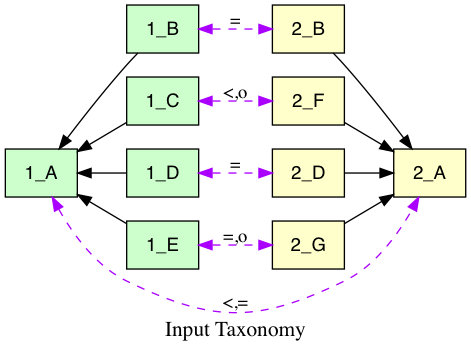

In [193]:
draw(G, show='ipynb')